# Water Cooling System Design Calculator

This notebook provides a comprehensive tool for designing water cooling systems in laboratory environments. It covers:

1. **Flow Rate Calculations** using Hazen-Williams equation and Darcy equation
2. **Heat Transfer Calculations** for temperature rise estimation
3. **Complete System Design** with practical examples
4. **Interactive Design Tools** for optimization

Based on engineering principles and empirical correlations for accurate cooling system design.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

# Set plotting style
try:
    import seaborn as sns
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    print("Using seaborn styling")
except:
    # Fallback to basic matplotlib styling
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['font.size'] = 10
    print("Using matplotlib default styling")

print("Libraries imported successfully!")
print("Ready for water cooling system design calculations.")

Using matplotlib default styling
Libraries imported successfully!
Ready for water cooling system design calculations.


## 1. Flow Rate Calculations

### Theory

For water cooling systems, we need to calculate the required flow rate based on:
- **Hazen-Williams Equation** for pressure drop in pipes (using US units)
- **Darcy Equation** for flow rate calculations
- **System resistance** considerations

### US Units System

All calculations will use **US customary units** for consistency with standard plumbing and HVAC practices:

**Hazen-Williams Equation (US Units):**

$$S = \frac{\Delta P}{L} = \frac{4.52 \cdot Q^{1.852}}{C^{1.852} \cdot D^{4.87}}$$

Where:
- **S** = frictional resistance (pressure drop per foot) in **psi/ft**
- **ΔP** = pressure drop over length L in **psi** (pounds per square inch absolute)
- **L** = length of pipe in **feet**
- **Q** = flow rate in **gpm** (gallons per minute)
- **C** = pipe roughness coefficient (dimensionless)
- **D** = inside pipe diameter in **inches**

**For coil flow rate:** $Q_{coil} = \left(\frac{C^{1.852} \cdot d^{4.87} \cdot \Delta P_{coil}}{4.52 \cdot L}\right)^{0.526}$

**Alternative simplified calculation:** $Q = k \sqrt{\frac{\Delta P \cdot D^2}{L}}$ (with appropriate US unit constants)

In [46]:
class FlowRateCalculator:
    """
    Calculator for water cooling flow rates using US customary units
    All calculations use: gpm, inches, feet, psi
    """
    
    def __init__(self):
        # FlowRateCalculator focuses on hydraulic calculations using US units
        pass
    
    def hazen_williams_pipe_loss(self, Q_gpm, C, D_inch, L_ft):
        """
        Calculate pressure loss in pipe using Hazen-Williams equation (US units)
        
        Parameters:
        Q_gpm: Flow rate in gallons per minute (gpm)
        C: Roughness coefficient (typically 130-150 for smooth pipes, 120 for steel, 100 for old pipes)
        D_inch: Pipe diameter in inches
        L_ft: Pipe length in feet
        
        Returns:
        Pressure loss in psi (pounds per square inch absolute)
        """
        # Hazen-Williams equation (US units): S = 4.52 * Q^1.852 / (C^1.852 * D^4.87)
        # Where S is pressure drop per foot (psi/ft)
        S = 4.52 * (Q_gpm**1.852) / (C**1.852 * D_inch**4.87)
        delta_P_psi = S * L_ft  # Total pressure drop
        return delta_P_psi
    
    def coil_flow_rate_hazen_williams(self, delta_P_psi, C, D_inch, L_ft):
        """
        Calculate flow rate in coil using Hazen-Williams equation (US units)
        
        Parameters:
        delta_P_psi: Available pressure drop for coil in psi
        C: Roughness coefficient
        D_inch: Coil diameter in inches
        L_ft: Coil length in feet
        
        Returns:
        Flow rate in gpm
        """
        # Rearranged Hazen-Williams: Q = (S * C^1.852 * D^4.87 / 4.52)^(1/1.852)
        # Where S = delta_P / L
        S = delta_P_psi / L_ft  # Pressure drop per foot
        Q_gpm = ((S * C**1.852 * D_inch**4.87) / 4.52)**(1/1.852)
        return Q_gpm
    
    
    def ucsb_darcy_flow_rate(self, delta_P_psi, D_H_inch, d_inch, L_ft):
        """
        UCSB Thesis method - Darcy-based flow rate calculation (US units)
        Based on: Q = 8000 * sqrt(ΔP * D_H * d² / L) (original in metric)
        Converted to US units
        
        Parameters:
        delta_P_psi: Pressure drop in psi
        D_H_inch: Hydraulic diameter in inches
        d_inch: Pipe diameter in inches
        L_ft: Length in feet
        
        Returns:
        Flow rate in gpm
        """
        # Convert to metric for calculation, then back to US units
        # Original equation: Q = 8000 * sqrt(ΔP(atm) * D_H(cm) * d²(cm) / L(cm))
        delta_P_atm = delta_P_psi / 14.7  # Convert psi to atm
        D_H_cm = D_H_inch * 2.54  # Convert inches to cm
        d_cm = d_inch * 2.54
        L_cm = L_ft * 30.48  # Convert feet to cm
        
        # Calculate flow rate in the original units (L/min based on the constant 8000)
        Q_mls = 8000 * np.sqrt(delta_P_atm * D_H_cm  / L_cm)* d_cm**2
        Q_Lmin = Q_mls * 60 /1000
        
        # Convert mL/s to gpm
        Q_gpm = Q_Lmin * 0.2642
        return Q_gpm
    
    def effective_diameter_inch(self, width_inch, height_inch):
        """
        Calculate effective diameter for rectangular cross-sections (US units)
        
        Parameters:
        width_inch: Width in inches
        height_inch: Height in inches
        
        Returns:
        Effective diameter in inches
        """
        # For rectangular: D_eff = 4*Area/Perimeter
        area = width_inch * height_inch
        perimeter = 2 * (width_inch + height_inch)
        D_eff = 4 * area / perimeter
        return D_eff
    
    def unit_conversions(self):
        """
        Display common unit conversions for reference
        """
        print("UNIT CONVERSION REFERENCE:")
        print("-" * 40)
        print("Flow Rate:")
        print("  1 gpm = 3.785 L/min = 0.06309 L/s")
        print("  1 L/min = 0.2642 gpm")
        print()
        print("Length:")
        print("  1 foot = 0.3048 m = 12 inches")
        print("  1 inch = 25.4 mm = 0.0254 m")
        print("  1 meter = 3.281 ft = 39.37 inches")
        print()
        print("Pressure:")
        print("  1 psi = 6.895 kPa = 6895 Pa")
        print("  1 kPa = 0.145 psi")
        print("  1 Pa = 0.000145 psi")
        print("  1 atm = 14.7 psi = 101.325 kPa")
  


# Initialize calculator
flow_calc = FlowRateCalculator()
print("Flow rate calculator initialized !")

# Display unit conversions for reference
flow_calc.unit_conversions()

Flow rate calculator initialized !
UNIT CONVERSION REFERENCE:
----------------------------------------
Flow Rate:
  1 gpm = 3.785 L/min = 0.06309 L/s
  1 L/min = 0.2642 gpm

Length:
  1 foot = 0.3048 m = 12 inches
  1 inch = 25.4 mm = 0.0254 m
  1 meter = 3.281 ft = 39.37 inches

Pressure:
  1 psi = 6.895 kPa = 6895 Pa
  1 kPa = 0.145 psi
  1 Pa = 0.000145 psi
  1 atm = 14.7 psi = 101.325 kPa


In [57]:
# ============================================================================
# USAGE EXAMPLES 
# ============================================================================

## Pipe Paramter
total_flow_rate = 2 # L/min
total_flow_rate_gpm = total_flow_rate/3.785 # gpm (equivalent to ~2 L/min)
pipe_roughness = 150  # Hazen-Williams coefficient for smooth copper (150 for plastic, 120 for steel)

pipe_diameter_inch = 0.5  # inch (Pipe Inner Diameter)
pipe_length_m = 20
pipe_length_ft = pipe_length_m / 0.3045  # feet (equivalent to ~20 m)


## Coil Paramter:
available_pressure_psi = 500  # psi 
coil_roughness = 140  # Copper
Coil_diameter_inch = 0.063  # inches (Coil Inner Diameter)
Coil_length_m = 32 # Coil Length in meter
Coil_length_ft = Coil_length_m / 0.3045  # feet (Coil_Length)


print("\n" + "="*70)
print("FLOW RATE CALCULATOR")
print("="*70)

# Example 1: Calculate pressure drop in supply pipe
print("\n1. Pressure Drop Calculation Example:")
print("-" * 50)

pressure_drop_psi = flow_calc.hazen_williams_pipe_loss(total_flow_rate_gpm, pipe_roughness, pipe_diameter_inch, pipe_length_ft)
print(f"Flow rate: {total_flow_rate_gpm} gpm")
print(f"Pipe: {pipe_diameter_inch}\" diameter, {pipe_length_ft} ft length")
print(f"Roughness coefficient (C): {pipe_roughness}")
print(f"Pressure drop: {pressure_drop_psi:.3f} psi)")

# Example 2: Calculate required flow rate for cooling coil
print("\n2. Coil Flow Rate Calculation Example:")
print("-" * 50)


coil_flow_rate_gpm = flow_calc.coil_flow_rate_hazen_williams(available_pressure_psi, coil_roughness, Coil_diameter_inch, Coil_length_ft)
print(f"Available pressure for coil: {available_pressure_psi:.2f} psi ({(available_pressure_psi-14.7)*6.895:.0f} kPa gauge)")
print(f"Coil: {Coil_diameter_inch}\" diameter, {Coil_length_ft} ft length")
print(f"Flow rate: {coil_flow_rate_gpm:.2f} gpm ({coil_flow_rate_gpm*3.785:.2f} L/min)")

# Example 3: Simplified flow rate calculation
print("\n3. Simplified Flow Rate Calculation Example (UCSB Thesis):")
print("-" * 50)

hydraulic_diameter_inch=Coil_diameter_inch# For circular pipe, D_H = D

flow_rate_ucsb_gpm = flow_calc.ucsb_darcy_flow_rate(available_pressure_psi, hydraulic_diameter_inch, Coil_diameter_inch, Coil_length_ft)
print(f"Pressure drop: {available_pressure_psi:.1f} psi")
print(f"Tube: {Coil_diameter_inch}\" diameter, {Coil_length_ft} ft length")
print(f"Flow rate : {flow_rate_ucsb_gpm:.2f} gpm ({flow_rate_ucsb_gpm*3.785:.2f} L/min)")


print("\n" + "="*70)
print("FLOW RATE CALCULATOR")
print("="*70)




FLOW RATE CALCULATOR

1. Pressure Drop Calculation Example:
--------------------------------------------------
Flow rate: 0.5284015852047556 gpm
Pipe: 0.5" diameter, 65.68144499178982 ft length
Roughness coefficient (C): 150
Pressure drop: 0.249 psi)

2. Coil Flow Rate Calculation Example:
--------------------------------------------------
Available pressure for coil: 500.00 psi (3346 kPa gauge)
Coil: 0.063" diameter, 105.09031198686371 ft length
Flow rate: 0.10 gpm (0.38 L/min)

3. Simplified Flow Rate Calculation Example (UCSB Thesis):
--------------------------------------------------
Pressure drop: 500.0 psi
Tube: 0.063" diameter, 105.09031198686371 ft length
Flow rate : 0.13 gpm (0.51 L/min)

FLOW RATE CALCULATOR


## 2. Heat Transfer Calculations (SI Units)

### Simple Version: Water Temperature Rise

For basic calculations using SI units, we can estimate the water temperature rise using:

$$P_{heatload} = \dot{m} C_p \Delta T$$

Which simplifies to:

$$\Delta T_{°C} = \frac{P_{W}}{\dot{m}_{kg/s} \times C_p}$$

Or in practical units:

$$\Delta T_{°C} = \frac{P_{W} \times 60}{Q_{L/min} \times \rho \times C_p} = \frac{P_{W}}{Q_{L/min} \times 69.77}$$

Where:
- **P** = Heat Load in **W** (Watts)
- **Q** = Flow Rate in **L/min** (liters per minute)  
- **ρ** = Water density ≈ **998 kg/m³**
- **Cp** = Specific heat of water ≈ **4182 J/(kg·K)**
- **69.77** = conversion factor (ρ × Cp / 60) for L/min to mass flow

In [79]:
class HeatTransferCalculator:
    """
    Calculator for heat transfer in water cooling systems (SI Units)
    Uses: L/min, mm, °C, W, W/(m²·K)
    """
    
    def __init__(self):
        # Water properties at ~20°C in SI units
        self.rho_kg_m3 = 998  # kg/m³ - density
        self.mu_Pa_s = 1.002e-3  # Pa·s - dynamic viscosity
        self.k_W_m_K = 0.598  # W/(m·K) - thermal conductivity
        self.Cp_J_kg_K = 4182  # J/(kg·K) - specific heat
        self.Pr = 7.01  # Prandtl number (dimensionless)
    
    def simple_temp_rise_C(self, P_W, Q_Lmin):
        """
        Calculate simple water temperature rise (SI units)
        
        Parameters:
        P_W: Heat load in Watts
        Q_Lmin: Flow rate in L/min
        
        Returns:
        Temperature rise in °C
        """
        # Convert flow rate to kg/s: L/min → m³/s → kg/s
        Q_m3_s = Q_Lmin / (1000 * 60)  # L/min to m³/s
        mass_flow_kg_s = Q_m3_s * self.rho_kg_m3  # m³/s to kg/s
        
        # ΔT = P / (ṁ × Cp)
        delta_T_C = P_W / (mass_flow_kg_s * self.Cp_J_kg_K)
        return delta_T_C
    
    def velocity_m_s(self, Q_Lmin, D_mm):
        """
        Calculate flow velocity in m/s
        
        Parameters:
        Q_Lmin: Flow rate in L/min
        D_mm: Diameter in mm
        
        Returns:
        Velocity in m/s
        """
        # Convert flow rate to m³/s
        Q_m3_s = Q_Lmin / (1000 * 60)  # L/min to m³/s
        # Convert diameter to meters and calculate area
        D_m = D_mm / 1000
        A_m2 = np.pi * (D_m/2)**2
        v_m_s = Q_m3_s / A_m2
        return v_m_s
    
    def reynolds_number_SI(self, Q_Lmin, D_mm):
        """
        Calculate Reynolds number (SI units)
        Re = ρvD/μ
        
        Parameters:
        Q_Lmin: Flow rate in L/min
        D_mm: Diameter in mm
        
        Returns:
        Reynolds number (dimensionless)
        """
        v_m_s = self.velocity_m_s(Q_Lmin, D_mm)
        D_m = D_mm / 1000
        
        # Re = ρ(kg/m³) × v(m/s) × D(m) / μ(Pa·s)
        Re = (self.rho_kg_m3 * v_m_s * D_m) / self.mu_Pa_s
        return Re
    
    def nusselt_dittus_boelter(self, Re, Pr=None):
        """
        Calculate Nusselt number using Dittus-Boelter correlation
        Nu = 0.023 * Re^0.8 * Pr^0.4
        Valid for Re ≥ 10⁴ and 0.7 ≤ Pr ≤ 160
        """
        if Pr is None:
            Pr = self.Pr
        
        if Re < 10000:
            print(f"Warning: Re = {Re:.0f} < 10,000. Dittus-Boelter may not be accurate.")
        
        Nu = 0.023 * (Re**0.8) * (Pr**0.4)
        return Nu
    
    def nusselt_gnielinski(self, Re, Pr=None):
        """
        Calculate Nusselt number using Gnielinski correlation
        Valid for transition to moderate turbulent flow: 2300 ≤ Re ≤ 5×10⁵, 0.5 ≤ Pr ≤ 200, L/D ≥ 10
        
        Nu = (f/8)(Re-1000)Pr / (1 + 12.7√(f/8)(Pr^(2/3) - 1))
        
        Where friction factor f ≈ (0.79 ln Re - 1.64)^(-2) (for smooth tubes)
        
        Parameters:
        Re: Reynolds number
        Pr: Prandtl number (optional, uses water default if None)
        
        Returns:
        Nu: Nusselt number
        """
        if Pr is None:
            Pr = self.Pr
        
        # Check validity range
        if Re < 2300:
            print(f"Warning: Re = {Re:.0f} < 2300. Gnielinski correlation may not be accurate.")
        elif Re > 5e5:
            print(f"Warning: Re = {Re:.0f} > 5×10⁵. Gnielinski correlation may not be accurate.")
        
        if Pr < 0.5 or Pr > 200:
            print(f"Warning: Pr = {Pr:.2f} outside range [0.5, 200]. Gnielinski correlation may not be accurate.")
        
        # Friction factor calculation (Blasius relation for smooth tubes)
        f = (0.79 * np.log(Re) - 1.64)**(-2)
        
        # Gnielinski formula
        numerator = (f/8) * (Re - 1000) * Pr
        denominator = 1 + 12.7 * np.sqrt(f/8) * (Pr**(2/3) - 1)
        
        Nu = numerator / denominator
        return Nu
    
    def calculate_nusselt_auto(self, Re, Pr=None):
        """
        Automatically select the best Nusselt number correlation based on Reynolds number
        
        Parameters:
        Re: Reynolds number
        Pr: Prandtl number (optional)
        
        Returns:
        Nu: Nusselt number
        method: String indicating which method was used
        """
        if Re < 2300:
            # Laminar flow - use simple correlation or warn
            Nu = 3.66  # Constant Nu for fully developed laminar flow in circular pipe
            method = "Laminar (Nu=3.66)"
            print(f"Laminar flow detected (Re={Re:.0f}). Using constant Nu=3.66")
        elif 2300 <= Re <= 10000:
            # Transition/low turbulent - use Gnielinski
            Nu = self.nusselt_gnielinski(Re, Pr)
            method = "Gnielinski"
        else:
            # High turbulent - use Dittus-Boelter
            Nu = self.nusselt_dittus_boelter(Re, Pr)
            method = "Dittus-Boelter"
        
        return Nu, method
    
    def heat_transfer_coefficient_SI(self, Nu, D_mm):
        """
        Calculate convective heat transfer coefficient (SI units)
        h = Nu × k / D
        
        Parameters:
        Nu: Nusselt number
        D_mm: Diameter in mm
        
        Returns:
        Heat transfer coefficient in W/(m²·K)
        """
        D_m = D_mm / 1000
        h_SI = Nu * self.k_W_m_K / D_m
        return h_SI
    
    def simplified_h_correlation_SI(self, Q_Lmin, D_mm):
        """
        Simplified correlation for water heat transfer coefficient (SI units)
        Empirical correlation: h ≈ C × Q^0.8 × D^(-1.8)
        
        Parameters:
        Q_Lmin: Flow rate in L/min
        D_mm: Diameter in mm
        
        Returns:
        Heat transfer coefficient in W/(m²·K)
        """
        # Empirical constant for SI units (water at ~20°C)
        C = 86430  # Adjusted constant for SI units
        h_SI = C * (Q_Lmin**0.8) * (D_mm**(-1.8))
        return h_SI
    
    def coil_water_temp_difference_C(self, P_W, h_SI, A_m2):
        """
        Calculate temperature difference between coil and water (SI units)
        
        Parameters:
        P_W: Heat load in Watts
        h_SI: Heat transfer coefficient in W/(m²·K)
        A_m2: Heat transfer area in m²
        
        Returns:
        Temperature difference in °C
        """
        delta_T_C = P_W / (h_SI * A_m2)
        return delta_T_C
    
    def total_coil_temperature_C(self, T_water_avg_C, delta_T_coil_water_C):
        """
        Calculate total coil temperature in °C
        """
        return T_water_avg_C + delta_T_coil_water_C
    

    

# Initialize heat transfer calculator
heat_calc = HeatTransferCalculator()
print("Heat transfer calculator initialized (SI units)!")



Heat transfer calculator initialized (SI units)!


In [ ]:
# ============================================================================
# HEAT TRANSFER EXAMPLES (SI UNITS)
# ============================================================================

print("\n" + "="*70)
print("HEAT TRANSFER CALCULATOR (SI UNITS)")
print("="*70)

# Example parameters
heat_load_W = 893  # 2000W heat load
coil_diameter_mm = Coil_diameter_inch*25.4  # Coil_diamter in mm
coil_length_m = Coil_length_m/0.3038  # Coil_length in meter
coil_flow_rate_gpm_cal = flow_calc.coil_flow_rate_hazen_williams(available_pressure_psi, coil_roughness, Coil_diameter_inch, Coil_length_ft)
flow_rate_Lmin = coil_flow_rate_gpm_cal*3.785
inlet_temp_C = 20  # 20°C inlet temperature

print("\nSystem Parameters:")
print(f"Heat Load: {heat_load_W} W ({heat_load_W/1000:.1f} kW)")
print(f"Coil: {coil_diameter_mm:.2f} mm diameter, {coil_length_m:.1f} m length") 
print(f"Flow Rate: {flow_rate_Lmin:.2f} L/min")
print(f"Inlet Temperature: {inlet_temp_C}°C")

# Example 1: Water temperature rise calculation
print("\n1. Water Temperature Rise Calculation:")
print("-" * 50)

temp_rise_C = heat_calc.simple_temp_rise_C(heat_load_W, flow_rate_Lmin)
outlet_temp_C = inlet_temp_C + temp_rise_C
avg_water_temp_C = inlet_temp_C + temp_rise_C / 2

print(f"Water temperature rise: {temp_rise_C:.2f}°C")
print(f"Outlet temperature: {outlet_temp_C:.2f}°C")
print(f"Average water temperature: {avg_water_temp_C:.2f}°C")

# Example 2: Flow characteristics
print("\n2. Flow Characteristics:")
print("-" * 50)

velocity_m_s = heat_calc.velocity_m_s(flow_rate_Lmin, coil_diameter_mm)
Re = heat_calc.reynolds_number_SI(flow_rate_Lmin, coil_diameter_mm)

print(f"Flow velocity: {velocity_m_s:.2f} m/s")
print(f"Reynolds number: {Re:.0f}")
print(f"Flow regime: {'Turbulent' if Re > 4000 else 'Laminar' if Re < 2300 else 'Transitional'}")

# Example 3: Heat transfer analysis
print("\n3. Heat Transfer Analysis:")
print("-" * 50)

# Calculate Nusselt number and heat transfer coefficient using different methods
Nu_dittus = heat_calc.nusselt_dittus_boelter(Re)
Nu_gnielinski = heat_calc.nusselt_gnielinski(Re)
Nu_auto, method_used = heat_calc.calculate_nusselt_auto(Re)

h_dittus = heat_calc.heat_transfer_coefficient_SI(Nu_dittus, coil_diameter_mm)
h_gnielinski = heat_calc.heat_transfer_coefficient_SI(Nu_gnielinski, coil_diameter_mm)
h_auto = heat_calc.heat_transfer_coefficient_SI(Nu_auto, coil_diameter_mm)

print(f"Nusselt number (Dittus-Boelter): {Nu_dittus:.2f}")
print(f"Nusselt number (Gnielinski): {Nu_gnielinski:.2f}")
print(f"Heat transfer coefficient (Dittus-Boelter): {h_dittus:.0f} W/(m²·K)")
print(f"Heat transfer coefficient (Gnielinski): {h_gnielinski:.0f} W/(m²·K)")
print(f"Heat transfer coefficient (Auto-selected): {h_auto:.0f} W/(m²·K)")

# Use auto-selected method for further calculations
h_SI = h_auto

# Example 4: Coil temperature prediction
print("\n4. Coil Temperature Prediction:")
print("-" * 50)

# Calculate coil surface area (outer surface)
coil_surface_area_m2 = np.pi * (coil_diameter_mm/1000) * coil_length_m
delta_T_coil_water_C = heat_calc.coil_water_temp_difference_C(heat_load_W, h_SI, coil_surface_area_m2)
coil_temp_C = heat_calc.total_coil_temperature_C(avg_water_temp_C, delta_T_coil_water_C)

print(f"Coil surface area: {coil_surface_area_m2:.4f} m²")
print(f"Temperature difference (coil-water): {delta_T_coil_water_C:.2f}°C")
print(f"Predicted coil temperature: {coil_temp_C:.2f}°C")

# Example 5: Design validation
print("\n5. Design Validation:")
print("-" * 50)

max_temp_rise_C = 30  # Maximum allowed temperature rise
max_coil_temp_C = 50  # Maximum allowed coil temperature

temp_rise_ok = temp_rise_C <= max_temp_rise_C
coil_temp_ok = coil_temp_C <= max_coil_temp_C

print(f"Temperature rise limit ({max_temp_rise_C}°C): {'✓ PASS' if temp_rise_ok else '✗ FAIL'}")
print(f"Coil temperature limit ({max_coil_temp_C}°C): {'✓ PASS' if coil_temp_ok else '✗ FAIL'}")
print(f"Overall design: {'✓ ACCEPTABLE' if (temp_rise_ok and coil_temp_ok) else '✗ NEEDS REVISION'}")

if not temp_rise_ok:
    required_flow_Lmin = heat_load_W / (max_temp_rise_C * 69.77)
    print(f"  → Required flow rate for {max_temp_rise_C}°C rise: {required_flow_Lmin:.2f} L/min")

if not coil_temp_ok:
    print(f"  → Consider: larger coil diameter, longer coil, or higher flow rate")

print("\n" + "="*70)


HEAT TRANSFER CALCULATOR (SI UNITS)

System Parameters:
Heat Load: 893 W (0.9 kW)
Coil: 1.60 mm diameter, 105.3 m length
Flow Rate: 0.38 L/min
Inlet Temperature: 20°C

1. Water Temperature Rise Calculation:
--------------------------------------------------
Water temperature rise: 33.85°C
Outlet temperature: 53.85°C
Average water temperature: 36.92°C

2. Flow Characteristics:
--------------------------------------------------
Flow velocity: 3.14 m/s
Reynolds number: 5010
Flow regime: Turbulent

3. Heat Transfer Analysis:
--------------------------------------------------
Nusselt number (Dittus-Boelter): 45.70
Nusselt number (Gnielinski): 40.49
Heat transfer coefficient (Dittus-Boelter): 17077 W/(m²·K)
Heat transfer coefficient (Gnielinski): 15133 W/(m²·K)
Heat transfer coefficient (Auto-selected): 15133 W/(m²·K)

4. Coil Temperature Prediction:
--------------------------------------------------
Coil surface area: 0.5295 m²
Temperature difference (coil-water): 0.11°C
Predicted coil tem

Water Temprature Rising vs Flow Rate

Generating analysis plots...


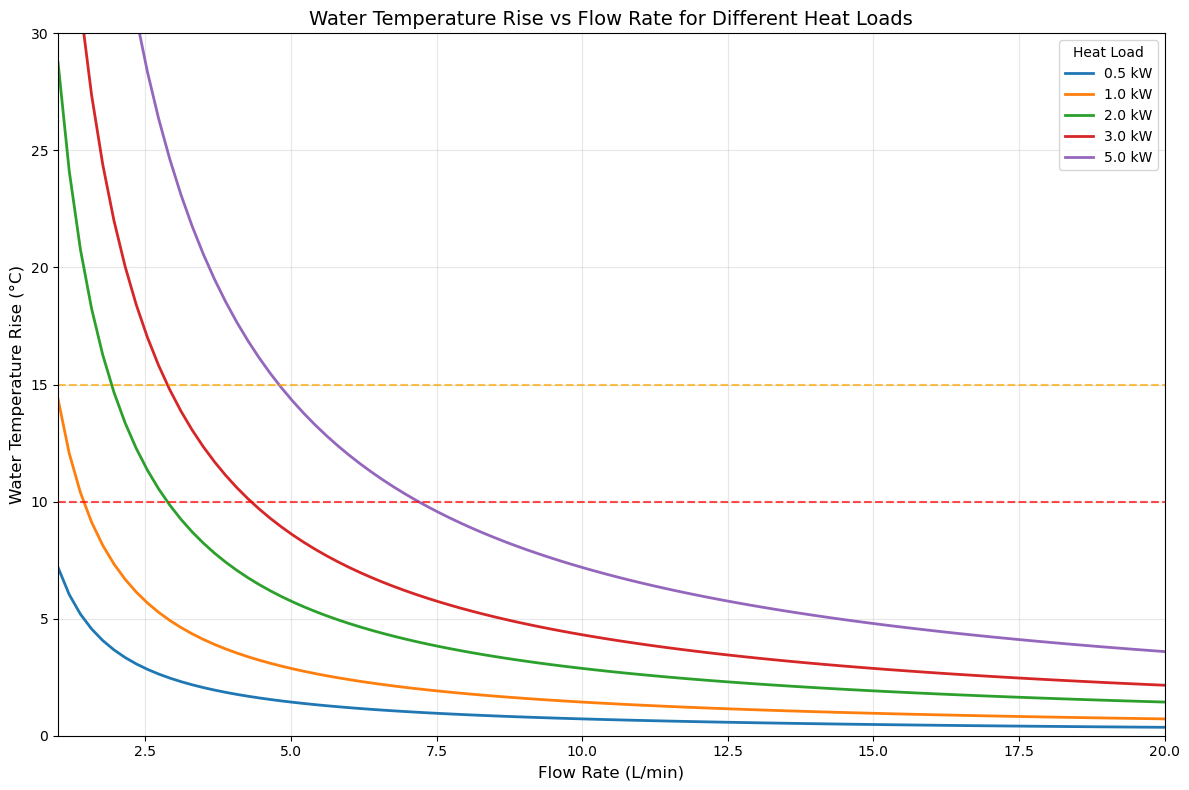

In [97]:
def plot_flow_vs_temp_rise(heat_loads=[0.5, 1.0, 2.0, 3.0, 5.0]):
    """
    Plot relationship between flow rate and temperature rise for different heat loads
    """
    flow_rates = np.linspace(1, 20, 100)  # L/min
    
    plt.figure(figsize=(12, 8))
    
    for heat_load in heat_loads:
        # Convert kW to W for the SI unit calculator
        heat_load_W = heat_load * 1000
        temp_rises = [heat_calc.simple_temp_rise_C(heat_load_W, Q) for Q in flow_rates]
        plt.plot(flow_rates, temp_rises, label=f'{heat_load} kW', linewidth=2)
    
    plt.xlabel('Flow Rate (L/min)', fontsize=12)
    plt.ylabel('Water Temperature Rise (°C)', fontsize=12)
    plt.title('Water Temperature Rise vs Flow Rate for Different Heat Loads', fontsize=14)
    plt.legend(title='Heat Load', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim(1, 20)
    plt.ylim(0, 30)
    
    # Add reference lines
    plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='10°C limit')
    plt.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='15°C limit')
    
    plt.tight_layout()
    plt.show()

# Generate plots
print("Generating analysis plots...")
plot_flow_vs_temp_rise()